In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


In [3]:
df_tracks=pd.read_csv('archive (3)/tracks.csv')

In [4]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [5]:
df_tracks.shape

(586672, 20)

In [6]:
df_tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [7]:
df_tracks.dropna(subset=['name'],inplace=True)

In [8]:
df_tracks.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [9]:
df_tracks.shape

(586601, 20)

### extracting year from date

In [10]:
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], format='%Y-%m-%d', errors='coerce')

In [11]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],NaT,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [12]:
df_tracks.isnull().sum()

id                       0
name                     0
popularity               0
duration_ms              0
explicit                 0
artists                  0
id_artists               0
release_date        138591
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

In [13]:
df_tracks.dropna(subset=['release_date'],inplace=True)

In [14]:
df_tracks['year']=df_tracks['release_date'].dt.year

In [15]:
df_tracks=df_tracks.drop('release_date',axis=1)

In [16]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.548,0.0391,6,-23.228,1,0.1530,0.996,0.9330,0.148,0.612,75.595,3,1922


In [17]:
df_tracks.shape

(448010, 20)

Since the dataset is too large, we're considering the time frame from the year 1990 

In [18]:
df = df_tracks[(df_tracks['year'] >= 1990)]

In [19]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
39501,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,2008
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,2020
39517,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4,2008
39521,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,2008
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,2018


In [20]:
df.shape

(279054, 20)

### Distribution of Songs across years

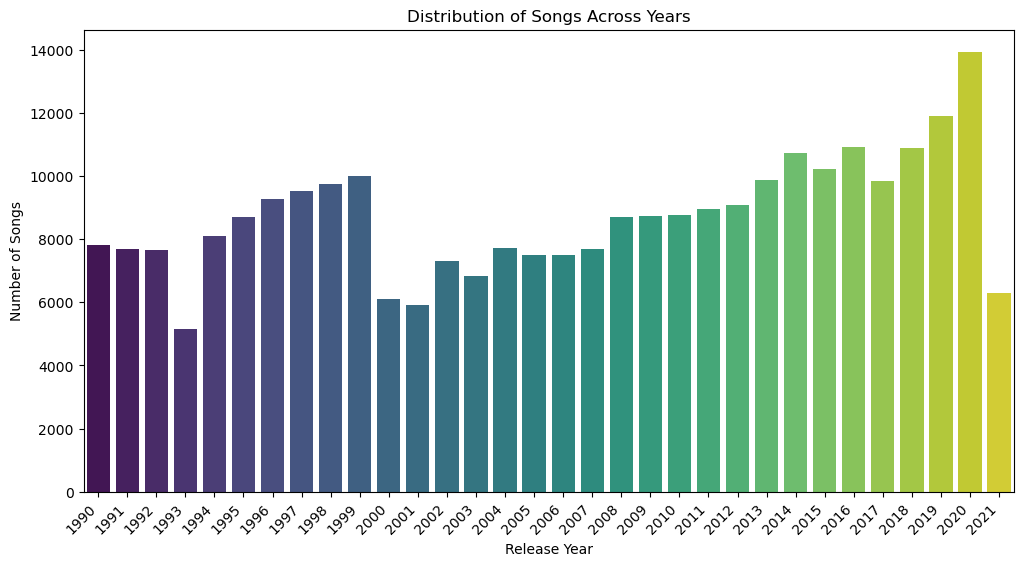

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Distribution of Songs Across Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [22]:
#resetting the index
df.reset_index(drop=True, inplace=True)

In [23]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,2008
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,2020
2,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4,2008
3,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,2008
4,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,2018


## Most Popular songs and artists over the years

The 'Popularity' metric in the dataset tells us the percentage of users that have listened to a song. It's a handy way to figure out which songs are the most popular over time. The higher the score, the more people have enjoyed the song.

In [24]:
max(df['popularity'])

100

In [25]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.484,0.265,0,-11.101,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,2008
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],0.671,0.867,2,-2.706,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,2020
2,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.405,0.365,6,-10.226,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4,2008
3,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],0.477,0.352,1,-14.165,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,2008
4,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],0.319,0.201,7,-17.796,1,0.0623,0.887,0.000000,0.904,0.239,117.153,3,2018


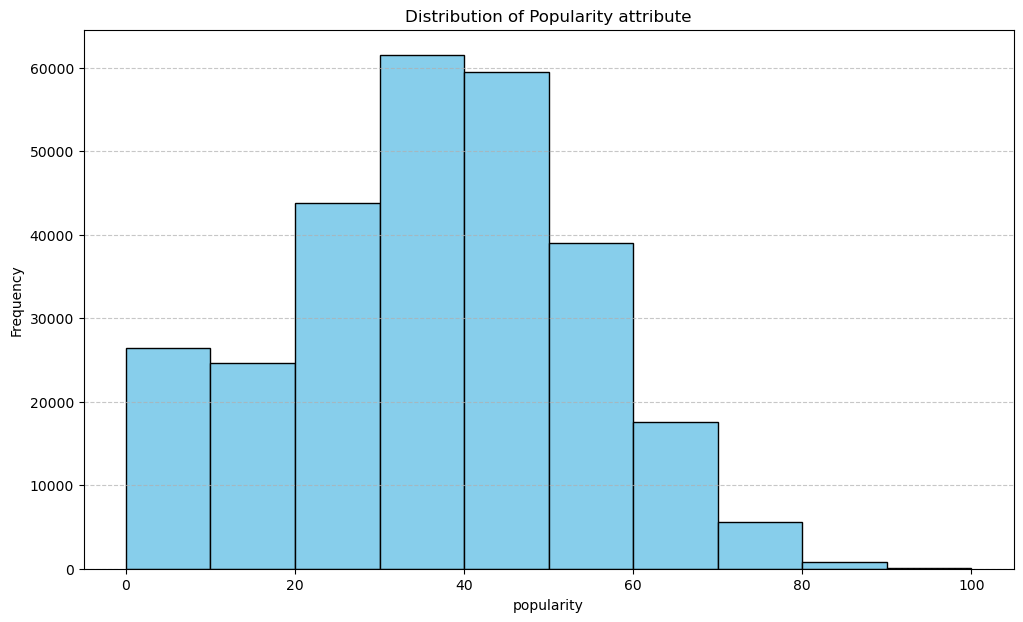

In [26]:
plt.figure(figsize=(12, 7))
plt.hist(df['popularity'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity attribute')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The histogram clearly shows that most songs fall within the popularity score range of 30 to 50, suggesting they are enjoyed by an average number of people. On the other hand, there are fewer songs with a popularity score exceeding 80%, indicating that songs widely loved by a large audience are less common.

In [27]:
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output



# Group by release year and find the row with the maximum popularity in each group
most_popular_songs = df.loc[df.groupby(df['year'])['popularity'].idxmax()]

# Create a JupyterDash application
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Most Popular Song and Artist by Year"),
    dcc.Graph(id='scatter-plot'),
])

# Callback to update the scatter plot based on the selected year
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('scatter-plot', 'hoverData')]
)
def update_scatter_plot(hover_data):
    if hover_data is None:
        return px.scatter(
            most_popular_songs,
            x='year',
            y='popularity',
            labels={'popularity': 'Popularity'},
            hover_data={'name': True,'artists':True},
        )

# Run the app in the notebook
app.run_server(mode='inline')

# Danceability and Energy

Danceability is a measure of how well a song facilitates or encourages dancing based on its musical elements. Several factors contribute to danceability like rythm, tempo, groove, speed and feel of the song. Energy is a perceptual quality that refers to the intensity and activity level of a piece of music. It's a subjective measure of how dynamic, powerful, or energetic a song feels to the listener. Aspects like tempo, rythm, dynamics, harmony etc contributes to energy.

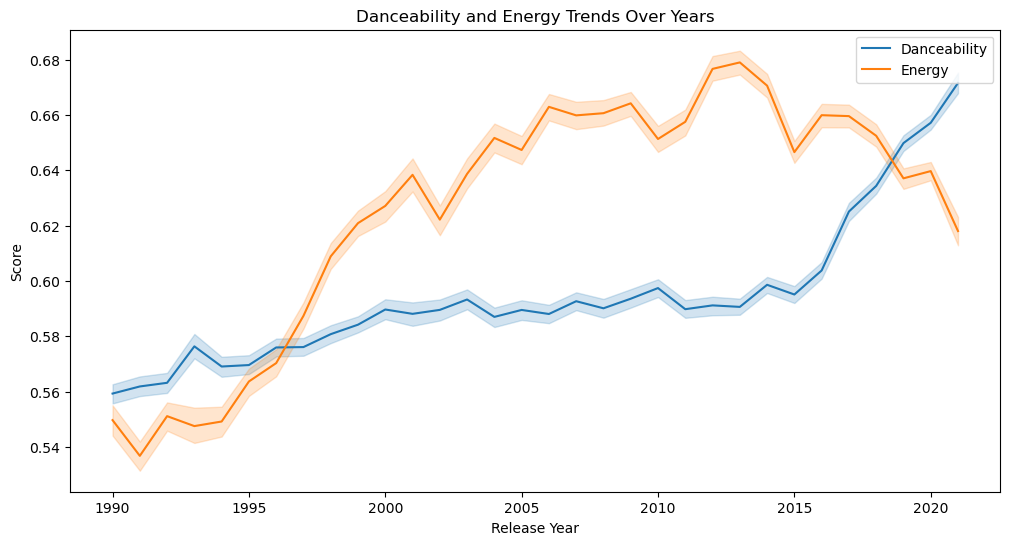

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='danceability', data=df, label='Danceability')
sns.lineplot(x='year', y='energy', data=df, label='Energy')
plt.title('Danceability and Energy Trends Over Years')
plt.xlabel('Release Year')
plt.ylabel('Score')
plt.legend()
plt.show()


From this graph, we can say that the danceability and energy is increasing over the years which means people are  enjoying the songs that make them groove. This could be indicative of changing preferences in music, with a preference for more danceable and energetic tunes.

# Correlation between Musical attributes

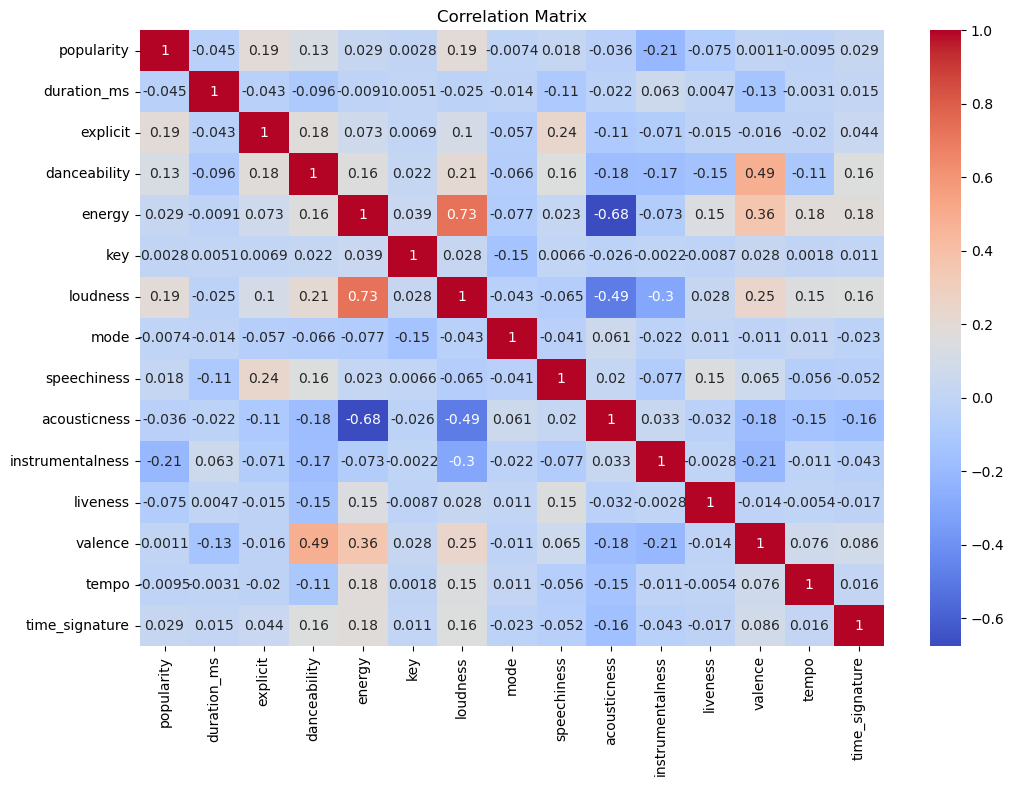

In [29]:
plt.figure(figsize=(12, 8))
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Here are some observations:

Danceability and valence are positively correlated, meaning that songs that are considered "danceable" are also typically more positive or happy-sounding. This is not surprising, as many high-energy, upbeat songs are also associated with positive emotions.

Energy and loudness are also positively correlated, which makes sense as louder songs often tend to have more energy.

Speechiness and acousticness are positively correlated. This suggests that songs that are more speech-driven also tend to be more acoustic, as opposed to electronic or heavily produced.

Tempo and liveness are positively correlated, meaning that faster songs tend to feel more live and energetic. This makes sense, as live music performances often involve faster tempos.

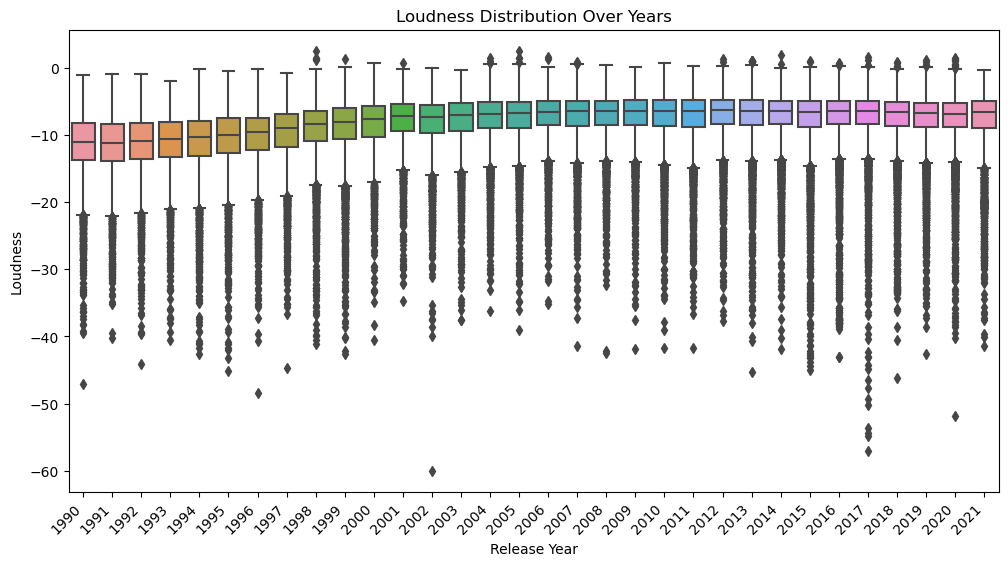

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='loudness', data=df)
plt.title('Loudness Distribution Over Years')
plt.xlabel('Release Year')
plt.ylabel('Loudness')
plt.xticks(rotation=45, ha='right')
plt.show()


The following inferences could be made based on the above boxplot:

A louder music has evolved over time. There are several possible reasons for this, including changes in musical preferences, or advancements in audio technology. Today's music offers a wider range of loudness. This could be because a greater variety of listening experiences are offered (e.g., listening to music on speakers versus headphones) or because more types of music are being produced.

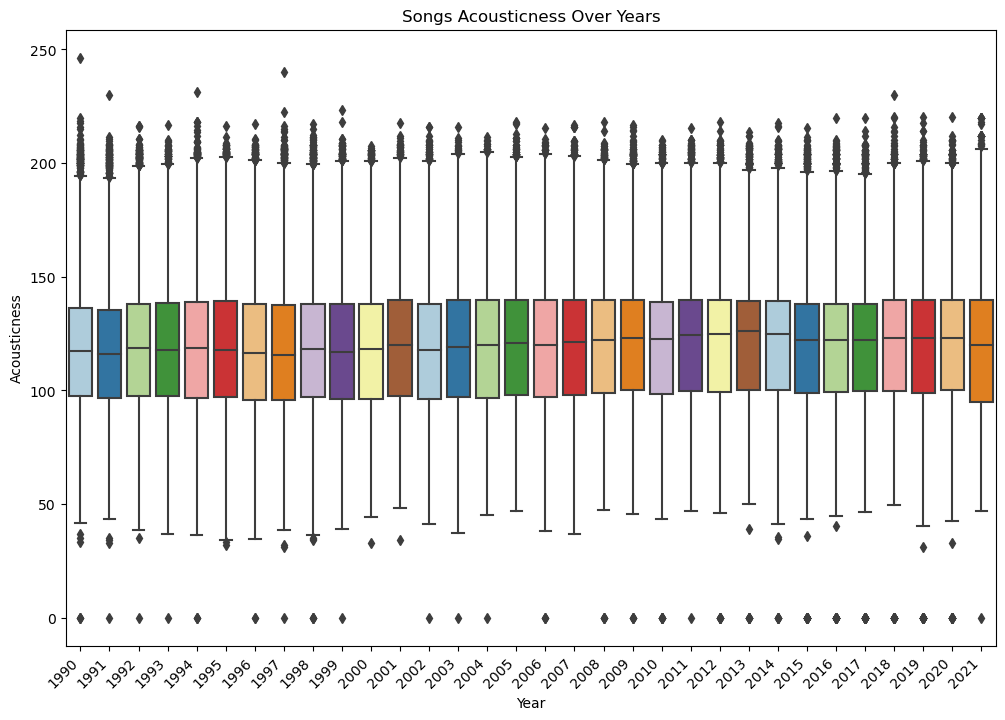

In [32]:
# Create a boxplot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='tempo', data=df, palette='Paired')
plt.title('Songs Acousticness Over Years')
plt.xlabel('Year')
plt.ylabel('Acousticness')
plt.xticks(rotation=45, ha='right')
plt.show()

The median acousticness of songs appears relatively stable across decades, suggesting a consistent incorporation of acoustic elements in music production over time.​

  There are some extreme values and outliers present every year, indicating that while most songs maintain a moderate level of acousticness, a few songs each year feature significantly higher acousticness.​

From the boxplot we can also infer:

More electronic and processed music may be popular today. This could be due to a number of factors, such as the growing popularity of electronic dance music (EDM) and hip hop, which often have lower acousticness and more electronic elements.

Listeners may be more receptive to a wider range of sounds. With the rise of streaming services and playlists, listeners are exposed to a wider variety of music than ever before. This could lead to a greater appreciation for different sonic textures, including both acoustic and electronic sounds.

# Most Frequent Artists

In [33]:
import ast

# Assuming 'artists' is a column in your DataFrame containing artist information
# Convert the string representation of the list to an actual list using ast.literal_eval
df['artists'] = df['artists'].apply(lambda x: ast.literal_eval(x.replace('$$', '')))

# Define a function to extract the first artist from the list
def extract_first_artist(artist_list):
    if artist_list:
        return artist_list[0]
    else:
        return None

df['first_artist'] = df['artists'].apply(extract_first_artist)



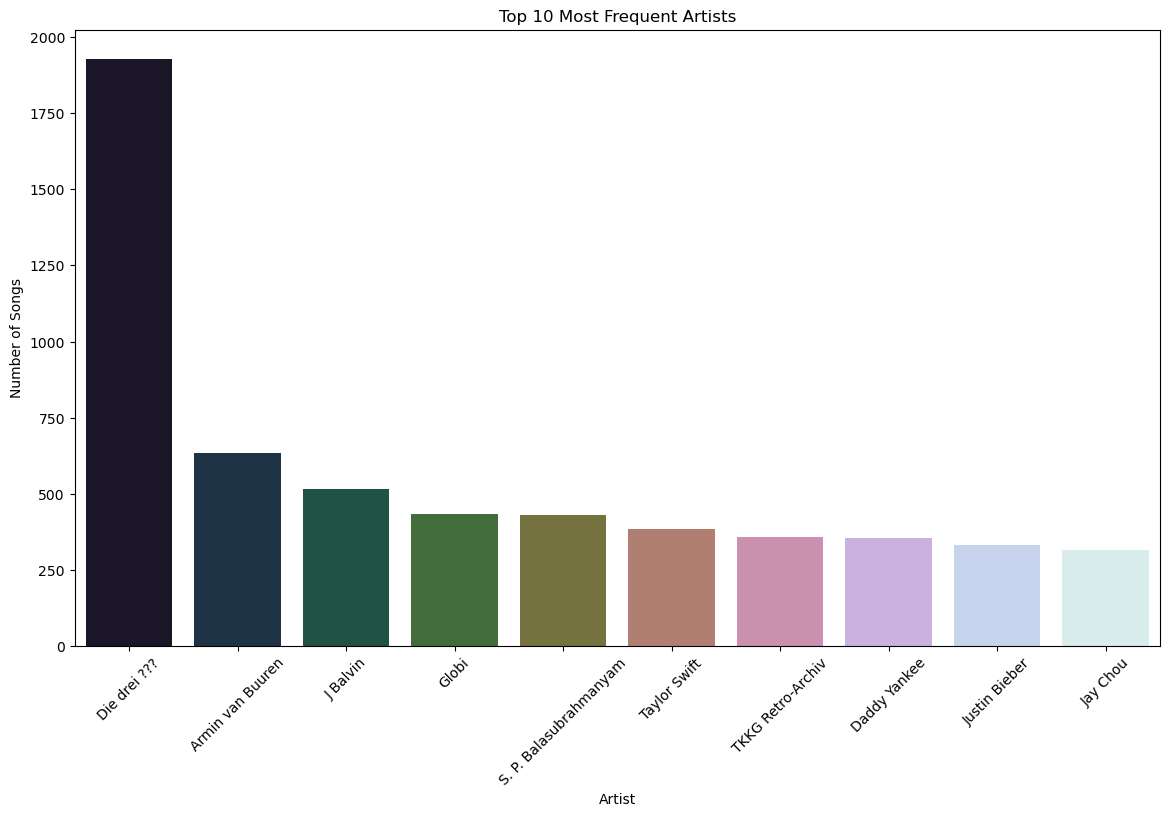

In [34]:
plt.figure(figsize=(14, 8))
sns.countplot(x='first_artist', data=df,order=df['first_artist'].value_counts().index[:10],palette='cubehelix')
plt.title('Top 10 Most Frequent Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

# Explicit Songs

Explicit songs refer to music tracks that contain explicit content, such as strong language, explicit lyrics, or themes that may be considered offensive or inappropriate. These songs often come with a content warning due to the presence of explicit material, and they may not be suitable for all audiences. The explicit content can include profanity, sexual references, violence, or other mature themes. 

In [35]:
from ipywidgets import interact, widgets

years = df['year'].unique()

def plot_explicit_count(year):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='explicit', data=df[df['year'] == year])
    plt.title(f'Explicit vs. Non-explicit Songs in {year}')
    plt.xlabel('Explicit')
    plt.ylabel('Number of Songs')
    plt.show()

# Create an interactive slider with all years
slider=widgets.IntSlider(min=min(years), max=max(years), step=1, value=min(years), layout=widgets.Layout(width='100%'))
slider.style.handle_color = 'red' 
interact(plot_explicit_count, year=slider)


interactive(children=(IntSlider(value=1990, description='year', layout=Layout(width='100%'), max=2021, min=199…

<function __main__.plot_explicit_count(year)>

By adjusting the year slider, we can evidently see that the prevalence of explicit songs has been rising over the years. This trend suggests a growing acceptance of content characterized by strong language and provocative themes among listeners. This increasing number of explicit songs suggests the changes in societal norms, evolving artistic expressions, or shifts in audience preferences. 





# Key Distribution over the years

In music theory, the key of a piece of music refers to the tonic note and chord upon which the musical composition is centered.Each key represents a unique combination of pitches and intervals that define the tonal characteristics of a piece of music. Following are the various keys used in music.

(0): Bright, happy, straightforward.

(1): Majestic, dramatic, intense.

(2): Energetic, triumphant, festive.

(3): Warm, passionate, rich.

(4): Uplifting, powerful, positive.

(5): Joyful, pastoral, simple.

(6): Romantic, lush, complex.

(7): Playful, lively, optimistic.

(8): Dramatic, mysterious, intense.

(9): Bright, bold, triumphant.

(10): Warm, soulful, expressive

(11): Energetic, vibrant, intense.

In [36]:
def plot_explicit_count(year):
    selected_year_data = df[df['year'] == year]
    key_counts = selected_year_data['key'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(key_counts, labels=key_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
    plt.title('Distribution of Songs in Different Musical Keys')
    plt.show()
slider=widgets.IntSlider(min=min(years), max=max(years), step=1, value=min(years), layout=widgets.Layout(width='100%'))
slider.style.handle_color = 'red' 
interact(plot_explicit_count, year=slider)

interactive(children=(IntSlider(value=1990, description='year', layout=Layout(width='100%'), max=2021, min=199…

<function __main__.plot_explicit_count(year)>

The pie chart reveals a consistent trend where songs in the keys '0' and '7' consistently resonate with listeners over the years. This suggests a enduring preference for bright, cheerful, playful, and optimistic musical compositions among the audience.